#Задание 1. Одномерная линейная статическая регрессионная модель

Загрузка данных и деление на трейн и тест

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from /content/train.csv
df = pd.read_csv('/content/train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [ ]:
df.corr()

,x,y
x,1.00000,0.99534
y,0.99534,1.00000


In [ ]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


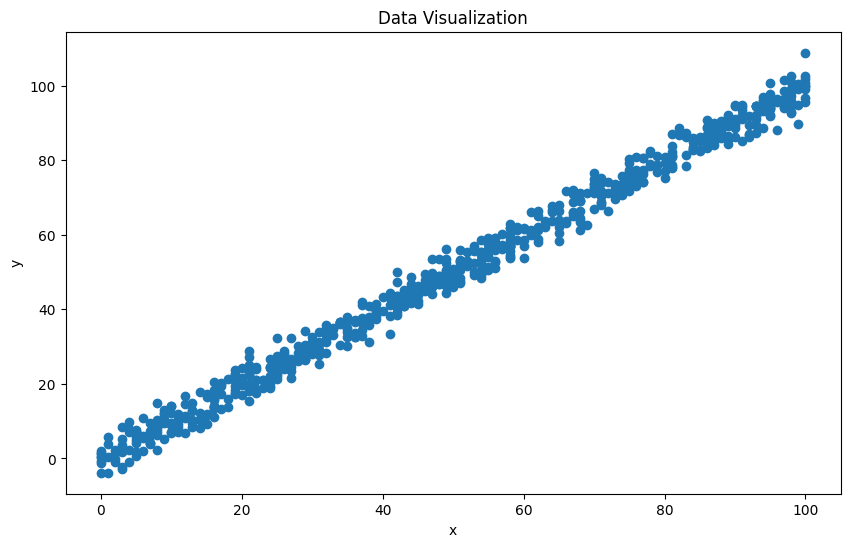

In [ ]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'])
plt.title('Data Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Sort the data by 'x'
df = df.sort_values(by='x')

# Split data into training and testing sets
train_data = df.iloc[:110:10]
test_data = df.iloc[110:200:20]

print("Training data:")
print(train_data)

print("Testing data:")
print(test_data)

Training data:
        x          y
41    0.0  -1.286311
291   1.0   3.778210
335   3.0   1.652309
52    5.0   4.098177
651   6.0  10.766757
488   8.0  10.240085
408   9.0  12.913285
193  10.0  12.184412
461  12.0  16.783540
344  14.0  10.267123
10   16.0  11.237573
Testing data:
        x          y
166  16.0  14.109991
484  20.0  20.728950
525  22.0  24.084983
93   25.0  25.462925
180  26.0  24.522749


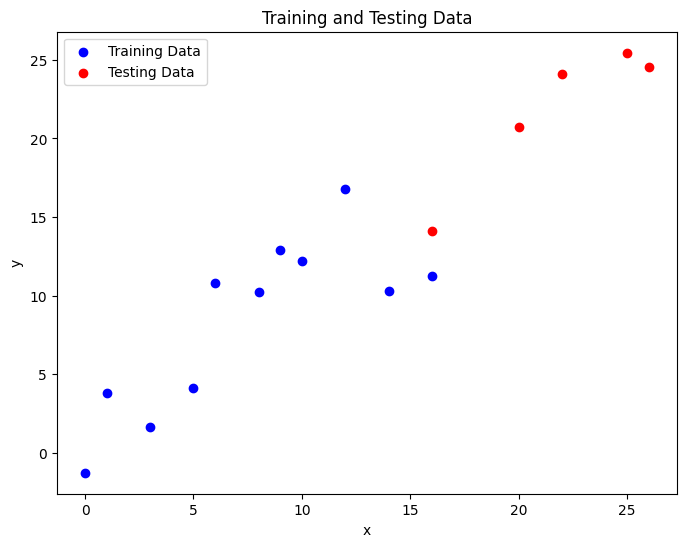

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot training data in blue
ax.scatter(train_data['x'], train_data['y'], color='blue', label='Training Data')

# Plot testing data in red
ax.scatter(test_data['x'], test_data['y'], color='red', label='Testing Data')

# Add title, x-axis label, and y-axis label
ax.set_title('Training and Testing Data')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Add legend
ax.legend()

# Show the plot
plt.show()

предположим, что функция линейна: Yт=A0+A1*X – гипотеза о виде теоретической функции, тогда коэффициенты будут вычисляться по формулам:

$$A_0 = \frac {\sum_{i=1}^n Y_i  \sum_{i=1}^n X_i^2 - \sum_{i=1}^n X_i Y_i \sum_{i=1}^n X_i} {n \sum_{i=1}^n X_i^2 -(\sum_{i=1}^n X_i)^2}$$


---


$$A_1 = \frac {n \sum_{i=1}^n X_i Y_i - \sum_{i=1}^n Y_i \sum_{i=1}^n X_i} {n \sum_{i=1}^n X_i^2 -(\sum_{i=1}^n X_i)^2}$$

Расчет параметров гипотезы МНК

In [ ]:
import pandas as pd

# Calculate the necessary sums
n = len(train_data)
sum_x = train_data['x'].sum()
sum_x_squared = (train_data['x'] ** 2).sum()
sum_y = train_data['y'].sum()
sum_xy = (train_data['x'] * train_data['y']).sum()

# Calculate A0 and A1
denominator = n * sum_x_squared - (sum_x ** 2)
A0 = (sum_y * sum_x_squared - sum_xy * sum_x) / denominator
A1 = (n * sum_xy - sum_y * sum_x) / denominator

print("A0:", A0)
print("A1:", A1)

A0: 1.891097127544355
A1: 0.8551558552382391


In [ ]:
# Create the table
table_data = {
    '№ точки': range(1, n+1),
    'X_i': train_data['x'],
    'Y_i': train_data['y'],
    'X_i^2': train_data['x'] ** 2,
    'X_i*Y_i': train_data['x'] * train_data['y'],
    'Yt_i': A0 + A1 * train_data['x'],# A0 + A1*X_i
    'E_i': (A0 + A1 * train_data['x']) - train_data['y'],
    'E_i^2': ((A0 + A1 * train_data['x']) - train_data['y']) ** 2
}

table = pd.DataFrame(table_data)

# Calculate additional values
sigma = (table['E_i^2'].sum() / n) ** 0.5
S = sum_x
P = sum_y
M = sum_x_squared
K = sum_xy
F = table['E_i^2'].sum()
L = (table['Yt_i'] - sigma <= train_data['y']) & (train_data['y'] <= table['Yt_i'] + sigma)

# Add additional columns to the table
table['Yt_i - сигма'] = table['Yt_i'] - sigma
table['Yt_i + сигма'] = table['Yt_i'] + sigma
table['Проверка, ответ'] = L

# Print the table
print("Таблица - Расчет параметров гипотезы методом наименьших квадратов")
table

Таблица - Расчет параметров гипотезы методом наименьших квадратов


,№ точки,X_i,Y_i,X_i^2,X_i*Y_i,Yt_i,E_i,E_i^2,Yt_i - сигма,Yt_i + сигма,"Проверка, ответ"
41,1,0.0,-1.286311,0.0,-0.000000,1.891097,3.177408,10.095922,-1.225874,5.008069,False
291,2,1.0,3.778210,1.0,3.778210,2.746253,-1.031957,1.064935,-0.370718,5.863224,True
335,3,3.0,1.652309,9.0,4.956927,4.456565,2.804256,7.863849,1.339593,7.573536,True
52,4,5.0,4.098177,25.0,20.490887,6.166876,2.068699,4.279515,3.049905,9.283848,True
651,5,6.0,10.766757,36.0,64.600541,7.022032,-3.744725,14.022962,3.905061,10.139004,False
488,6,8.0,10.240085,64.0,81.920680,8.732344,-1.507741,2.273283,5.615373,11.849315,True
408,7,9.0,12.913285,81.0,116.219569,9.587500,-3.325786,11.060850,6.470528,12.704471,False
193,8,10.0,12.184412,100.0,121.844117,10.442656,-1.741756,3.033714,7.325684,13.559627,True
461,9,12.0,16.783540,144.0,201.402477,12.152967,-4.630572,21.442200,9.035996,15.269939,False
344,10,14.0,10.267123,196.0,143.739717,13.863279,3.596156,12.932342,10.746308,16.980251,False


точек с E>0 и точек с E<0 примерно равное количество. Это говорит о том, что найденная теоретическая прямая проходит через совокупность экспериментальных точек «по середине»

In [ ]:
print("N =", n)
print("S =", S)
print("P =", P)
print("M =", M)
print("K =", K)
print("F =", F)
print("L =", L.sum())
print("Сигма =", sigma)

N = 11
S = 84.0
P = 92.635160243
M = 912.0
K = 938.754298691
F = 106.87061985192435
L = 5
Сигма = 3.1169714300309983


Проверка гипотезы

In [ ]:
#Вычислим относительную ошибку, приходящуюся на одну точку
import math
#p – количество использованных степеней свободы в составе гипотезы (в нашем случае
p=2
# Вычисление относительной ошибки
delta = math.sqrt(F / (n - p))
print("Относительная ошибка:", delta)

Относительная ошибка: 3.4459415718901103


In [ ]:
A0 = np.round(A0,2)
A1 = np.round(A1,2)
print("A0:", A0)
print("A1:", A1)

A0: 1.89
A1: 0.86


Количество точек, попавших в коридор точности yт +- δ: 5
Процент попадания:  0.45

Количество точек, попавших в коридор точности yт +- 2*δ: 11
Процент попадания:  1.0

Гипотезу нельзя принять.


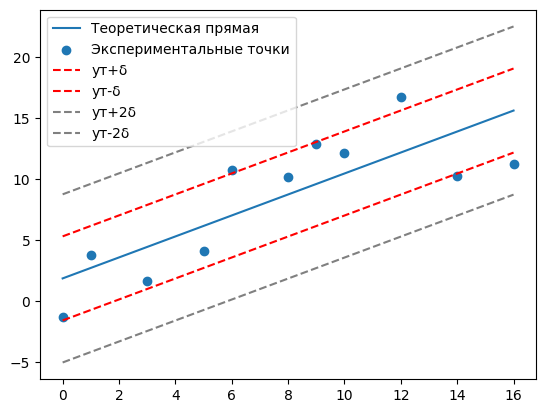

In [ ]:
# Построение прямой
y = A0 + A1 * train_data['x']
plt.plot(train_data['x'], y, label='Теоретическая прямая')

# Добавление экспериментальных точек
plt.scatter(train_data['x'], train_data['y'],
            label='Экспериментальные точки')

# Построение прямых, параллельных теоретической прямой
y_up = y + delta
y_down = y - delta
plt.plot(train_data['x'], y_up, label='yт+δ', linestyle='--', color='red')
plt.plot(train_data['x'], y_down, label='yт-δ', linestyle='--', color='red')

y_up_2 = y + 2*delta
y_down_2 = y - 2*delta
plt.plot(train_data['x'], y_up_2, label='yт+2δ', linestyle='--', color='gray')
plt.plot(train_data['x'], y_down_2, label='yт-2δ', linestyle='--', color='gray')

#перерасчет количества попавших точек
L_1 = (table['Yt_i'] - delta <= train_data['y']) & (train_data['y'] <= table['Yt_i'] + delta)
L_2 = (table['Yt_i'] - 2*delta <= train_data['y']) & (train_data['y'] <= table['Yt_i'] + 2*delta)

# Вывод количества точек, попавших в коридор точности
print("Количество точек, попавших в коридор точности yт +- δ:", L.sum())
print("Процент попадания: ", np.round(L.sum() / n,2))

print("\nКоличество точек, попавших в коридор точности yт +- 2*δ:", L_2.sum())
print("Процент попадания: ", np.round(L_2.sum() / n))

# Вывод о возможности принятия гипотезы
if (L.sum() / n) >= 0.68 and (L_2.sum() / n) >= 0.95:
    print("\nГипотезу можно принять.")
else:
    print("\nГипотезу нельзя принять.")

plt.legend()
plt.show()

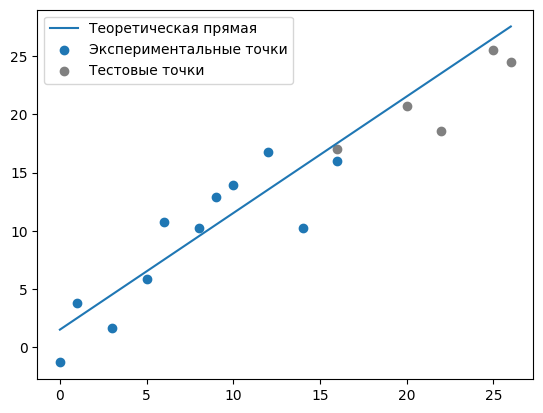

X: 16.0, y: 17.53
X: 20.0, y: 21.53
X: 22.0, y: 23.53
X: 25.0, y: 26.53
X: 26.0, y: 27.53


In [ ]:
# Построение прямой
y = A0 + A1 * pd.concat([train_data['x'], test_data['x']])

plt.plot(pd.concat([train_data['x'], test_data['x']]), y, label='Теоретическая прямая')
# Добавление экспериментальных точек
plt.scatter(train_data['x'], train_data['y'],
            label='Экспериментальные точки')
# Добавление тестовых точек
plt.scatter(test_data['x'], test_data['y'],
            label='Тестовые точки', color='gray')

plt.legend()
plt.show()

for x in test_data['x']:
  print(f"X: {x}, y: {A0 + A1 * x}")

#Задание 2. Нелинейная одномерная статическая регрессионная модель

проверим гипотезу:
$$Y=A_0 + A_1 *x + A_2 * x^2$$

нужно минимизировать ошибку вида:

$$F = \sum_{i=1}^n (A_0 + A_1 * x_i + A_2 * x_i^2 - Y_i)^2$$

для этого необходимо найти частные производные по каждой из коэффициентов:

$$\frac{\partial F}{\partial A_0} = 0, \quad \frac{\partial F}{\partial A_1} = 0, \quad \frac{\partial F}{\partial A_2} = 0$$

Используя правило взятия производной от сложных функций получаем:

Теперь найдём частные производные:

Частная производная по ( A_0 ):
$$ \frac{\partial F}{\partial A_0} = \sum_{i=1}^n 2(A_0 + A_1 x_i + A_2 x_i^2 - Y_i) \cdot 1 = 2 \sum_{i=1}^n (A_0 + A_1 x_i + A_2 x_i^2 - Y_i)$$

Частная производная по ( A_1 ):
$$ \frac{\partial F}{\partial A_1} = \sum_{i=1}^n 2(A_0 + A_1 x_i + A_2 x_i^2 - Y_i) \cdot x_i = 2 \sum_{i=1}^n (A_0 + A_1 x_i + A_2 x_i^2 - Y_i) x_i $$

Частная производная по ( A_2 ):
$$ \frac{\partial F}{\partial A_2} = \sum_{i=1}^n 2(A_0 + A_1 x_i + A_2 x_i^2 - Y_i) \cdot x_i^2 = 2 \sum_{i=1}^n (A_0 + A_1 x_i + A_2 x_i^2 - Y_i) x_i^2 $$

Для нахождения оптимальных значений коэффициентов ( A_0 ), ( A_1 ), и ( A_2 ), необходимо решить систему уравнений, полученную приравниванием этих частных производных к нулю:

\begin{align*} \sum_{i=1}^n (A_0 + A_1 x_i + A_2 x_i^2 - Y_i) &= 0, \ \sum_{i=1}^n (A_0 + A_1 x_i + A_2 x_i^2 - Y_i) x_i &=0, \ \sum_{i=1}^n (A_0 + A_1 x_i + A_2 x_i^2 - Y_i) x_i^2 &=0 \end{align*}


Система уравнений для минимизации функции ошибки ( F ) выглядит следующим образом:

\begin{align*} \sum_{i=1}^n (A_0 + A_1 x_i + A_2 x_i^2) &= \sum_{i=1}^n Y_i, \ \sum_{i=1}^n (A_0 x_i + A_1 x_i^2 + A_2 x_i^3) &= \sum_{i=1}^n Y_i x_i, \ \sum_{i=1}^n (A_0 x_i^2 + A_1 x_i^3 + A_2 x_i^4) &= \sum_{i=1}^n Y_i x_i^2. \end{align*}

Эта система может быть представлена в матричной форме как:

[ \begin{bmatrix} n & \sum x_i & \sum x_i^2 \ \sum x_i & \sum x_i^2 & \sum x_i^3 \ \sum x_i^2 & \sum x_i^3 & \sum x_i^4 \end{bmatrix} \begin{bmatrix} A_0 \ A_1 \ A_2 \end{bmatrix}
\begin{bmatrix} \sum Y_i \ \sum Y_i x_i \ \sum Y_i x_i^2 \end{bmatrix} ]

Обозначим:

Матрицу коэффициентов как ($ \mathbf{M} $).
Вектор неизвестных как ($ \mathbf{A} = [A_0, A_1, A_2]^T $).
Вектор правой части как ( $\mathbf{B} = [\sum Y_i, \sum Y_i x_i, \sum Y_i x_i^2]^T $).

Метод Крамера использует определители для нахождения решений:

Определитель основной матрицы ($ \Delta $):
$$ \Delta = \begin{vmatrix} n & \sum x_i & \sum x_i^2 \ \sum x_i & \sum x_i^2 & \sum x_i^3 \ \sum x_i^2 & \sum x_i^3 & \sum x_i^4 \end{vmatrix} $$

Определитель для ( A_0 ), заменяя первый столбец матрицы коэффициентов на вектор правой части:
$$\Delta_0 = \begin{vmatrix} \sum Y_i & \sum x_i & \sum x_i^2 \ \sum Y_i x_i & \sum x_i^2 & \sum x_i^3 \ \sum Y_i x_i^2 & \sum x_i^3 & \sum x_i^4 \end{vmatrix}$$

Определитель для ( A_1 ), заменяя второй столбец:
$$\Delta_1 = \begin{vmatrix} n & \sum Y_i & \sum x_i^2 \ \sum x_i & \sum Y_i x_i & \sum x_i^3 \ \sum x_i^2 & \sum Y_i x_i^2 & \sum x_i^4 \end{vmatrix}$$

Определитель для ( A_2 ), заменяя третий столбец:
$$ \Delta_2 = \begin{vmatrix} n & \sum x_i & \sum Y_i \ \sum x_i & \sum x_i^2 & \sum Y_i x_i \ \sum x_i^2 & \sum x_i^3 & \sum Y_i x_i^2 \end{vmatrix}$$

Решения для коэффициентов ( A_0 ), ( A_1 ), и ( A_2 ) находятся по формулам:

$$ A_0 = \frac{\Delta_0}{\Delta}, \quad A_1 = \frac{\Delta_1}{\Delta}, \quad A_2 = \frac{\Delta_2}{\Delta} $$

Эти формулы позволяют найти оптимальные значения коэффициентов, минимизирующие функцию ошибки ( F ).

In [ ]:
# import pandas as pd
# from scipy.optimize import curve_fit

# def mapping_func(x,A0,A1,A2):
#   return  A0 + A1 * x  + A2 * x**2

# args, covar = curve_fit(mapping_func, train_data['x'], train_data['y'])#находит оптимальные параметры функции, которые минимизируют разницу между функцией и заданными данными.

# A0, A1, A2 = args[0], args[1], args[2]

# res_y = A0 + A1 * train_data['x']  + A2 * train_data['x']**2
# print("A0:", A0)
# print("A1:", A1)
# print("A2:", A2)

A0: -1.3468867327679743
A1: 2.2550565335974317
A2: -0.08988359048325778


In [ ]:
# Создаем матрицу для полиномиальной регрессии второй степени
X = np.vstack((np.ones(train_data.shape[0]), train_data['x'], train_data['x']**2)).T
y = train_data['y'].values

# Вычисляем коэффициенты с использованием метода наименьших квадратов
# W = (X^T * X)^(-1) * X^T * y
W = np.linalg.inv(X.T @ X) @ X.T @ y

A0, A1, A2 = W[0], W[1], W[2]

# Предсказанные значения
res_y = A0 + A1 * train_data['x'] + A2 * train_data['x']**2

# Печать коэффициентов
print("A0:", A0)
print("A1:", A1)
print("A2:", A2)

A0: -1.3468867327628151
A1: 2.2550565335946855
A2: -0.08988359048087981


In [ ]:
A0 = np.round(A0,2)
A1 = np.round(A1,2)
A2 = np.round(A2,2)
print("A0:", A0)
print("A1:", A1)
print("A2:", A2)

A0: -1.35
A1: 2.26
A2: -0.09


In [ ]:
# Calculate the relative error
p = 3  # number of degrees of freedom
F = (sum((train_data['y'] - (A0 + A1 * train_data['x'] + A2 * (train_data['x'])**2)) ** 2) / (n - p))
delta = math.sqrt(F / (n - p))
print("Относительная ошибка:", delta)

Относительная ошибка: 0.9480527131081329


Количество точек, попавших в коридор точности yт +- δ: 4
Процент попадания:  0.36

Количество точек, попавших в коридор точности yт +- 2*δ: 6
Процент попадания:  0.55

Гипотезу нельзя принять.


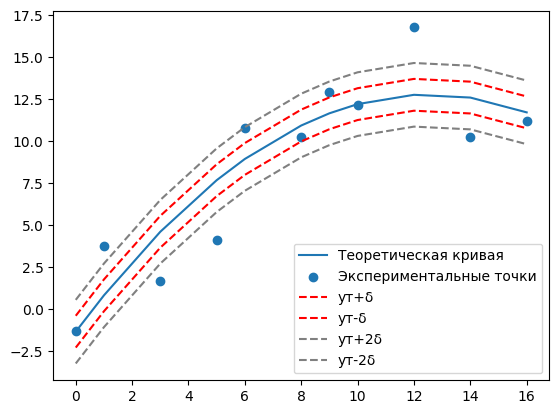

In [ ]:
# Plot the theoretical curve
y = A0 + A1 * train_data['x'] + A2 * (train_data['x'])**2
plt.plot(train_data['x'], y, label='Теоретическая кривая')

# Add experimental points
plt.scatter(train_data['x'], train_data['y'], label='Экспериментальные точки')

# Plot the confidence intervals
y_up = y + delta
y_down = y - delta
plt.plot(train_data['x'], y_up, label='yт+δ', linestyle='--', color='red')
plt.plot(train_data['x'], y_down, label='yт-δ', linestyle='--', color='red')

y_up_2 = y + 2*delta
y_down_2 = y - 2*delta
plt.plot(train_data['x'], y_up_2, label='yт+2δ', linestyle='--', color='gray')
plt.plot(train_data['x'], y_down_2, label='yт-2δ', linestyle='--', color='gray')

# Recalculate the number of points within the confidence interval
L_1 = (y_down <= train_data['y']) & (train_data['y'] <= y_up)
L_2 = (y_down_2 <= train_data['y']) & (train_data['y'] <= y_up_2)

# Print the number of points within the confidence interval
print("Количество точек, попавших в коридор точности yт +- δ:", L_1.sum())
print("Процент попадания: ", np.round(L_1.sum() / n, 2))

print("\nКоличество точек, попавших в коридор точности yт +- 2*δ:", L_2.sum())
print("Процент попадания: ", np.round(L_2.sum() / n, 2))

# Print the conclusion about the hypothesis
if (L_1.sum() / n) >= 0.68 and (L_2.sum() / n) >= 0.95:
    print("\nГипотезу можно принять.")
else:
    print("\nГипотезу нельзя принять.")

plt.legend()
plt.show()

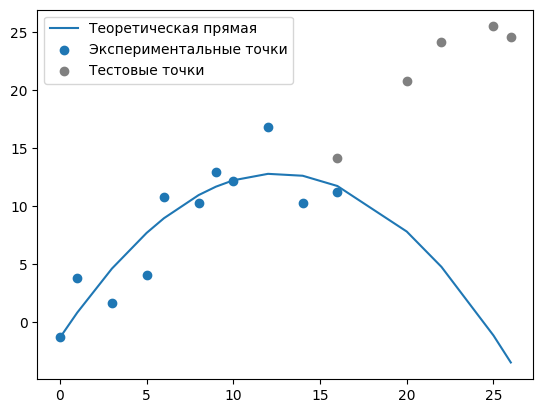

X: 16.0, y: 11.723818641646925
X: 20.0, y: 7.800807746778979
X: 22.0, y: 4.760699213574441
X: 25.0, y: -1.1477174434455577
X: 26.0, y: -3.4767240243757342


In [ ]:
# Построение прямой
y = A0 + A1 * pd.concat([train_data['x'], test_data['x']]) + A2 * (pd.concat([train_data['x'], test_data['x']]))**2

plt.plot(pd.concat([train_data['x'], test_data['x']]), y, label='Теоретическая прямая')
# Добавление экспериментальных точек
plt.scatter(train_data['x'], train_data['y'],
            label='Экспериментальные точки')
# Добавление тестовых точек
plt.scatter(test_data['x'], test_data['y'],
            label='Тестовые точки', color='gray')

plt.legend()
plt.show()

for x in test_data['x']:
  print(f"X: {x}, y: {A0 + A1 * x + A2 * (x)**2}")

#Задание 3. Многомерная линейная статическая регрессионная модель
Задайтесь своим датасетом. Составьте многомерную регрессионную модель. Нарисуйте геометрическую интерпретацию ответа. Оцените точность. Укажите важность (рейтинг) отдельных входных переменных для выхода

Файл CSV содержит почасовую/суточную сводку по району Сегед, Венгрия, за период с 2006 по 2016 гг.

Данные доступны в почасовом отклике:

* Время;
* Сводка;
* Тип осадков;
* Температура;
* Кажущаяся температура;
* Влажность;
* Скорость ветра;
* Скорость ветра;
* Видимость;
* Громкость;
* Давление;


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
#загрузка данных
df=pd.read_csv('weatherHistory.csv')

#обработка данных

In [ ]:
start_indx = 5000
end_indx = 10000
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 6   Wind Speed (km/h)         95936 non-null  float64
 7   Wind Bearing (degrees)    95936 non-null  float64
 8   Visibility (km)           95936 non-null  float64
 9   Loud Cover                95936 non-null  float64
 10  Pressure (millibars)      95936 non-null  float64
 11  Daily Summary             95936 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [ ]:
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
#преобразование типов
df['Formatted Date'] = df['Formatted Date'].apply(pd.to_datetime, utc=True)
df.sort_values('Formatted Date', inplace=True, ignore_index=True)
#создание нового столбца для хранения времени в нс
df['Timestamp'] = (df['Formatted Date']).astype(np.int64) / 1000000000
df['Timestamp'] = df.loc[:, 'Timestamp':].to_numpy() - df.loc[0, 'Timestamp'] +1
#удаление ненужных столбцов
df.drop('Daily Summary', axis=1, inplace=True)
df.drop('Formatted Date', axis=1, inplace=True)
df.drop('Summary', axis=1, inplace=True)#чтобы много не писать в мнк), но скорее всего важный столбец
df.drop('Apparent Temperature (C)', axis=1, inplace=True)#скорее относится к таргету

In [ ]:
df = df[start_indx:end_indx]

In [ ]:
df['Precip Type'].value_counts()

,count
Precip Type,
rain,4565
snow,435


#создание обучающих и тренировочных данных

In [ ]:
x = df.drop('Temperature (C)', axis=1)
y = df['Temperature (C)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    random_state=42,
                                                    shuffle = False)
x_t = X_train.copy(deep = True)
x_test = X_test.copy(deep = True)

In [ ]:
#нормализация
from sklearn.preprocessing import StandardScaler
# Создание объекта StandardScaler
scaler = StandardScaler()

# Выбор столбцов для нормализации
columns_to_normalize = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Timestamp']

# Нормализация столбцов в X_train
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])

# Нормализация столбцов в X_test
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

In [ ]:
#кодирование категориальных
X_train = pd.get_dummies(X_train,  drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
X_train.drop(["Loud Cover"], axis = 1, inplace = True)
X_test.drop(["Loud Cover"], axis = 1, inplace = True)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x_t['Timestamp'],
    y=y_train,
    name = "Обучающая выборка",
    line = dict(color = "green", width = 2)
))

fig.add_trace(go.Scatter(
    x = x_test['Timestamp'],
    y= y_test,
    name = "Тестовая выборка",
     line = dict(color = "red", width = 2)
))

fig.update_layout(title = "Мин температура",
                  xaxis_title = "Время",
                  yaxis_title = "Градус(°C)")
fig.show()

Функция для оценки предсказаний

In [ ]:
def calculate_coefficients(X, Y):
    # добавление столбца единиц
    X_with_ones = np.hstack((np.ones((X.shape[0], 1)), X))

    # Вычисляем коэффициенты с использованием метода наименьших квадратов
    # W = (X^T * X)^(-1) * X^T * y
    coefficients = np.linalg.inv(X_with_ones.T.dot(X_with_ones)).dot(X_with_ones.T).dot(Y)

    return coefficients

In [ ]:
def quality_assessment(res_y, y_test):
  from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, f1_score, r2_score

  predictions = np.array(res_y)
  y_test = np.array(y_test)

  mse = mean_squared_error(y_test, predictions)

  rmse = np.sqrt(mse)

  mae = mean_absolute_error(y_test, predictions)

  mape = np.mean(np.abs((predictions - y_test) / y_test)) * 100

  #accuracy = accuracy_score(y_test, predictions)
  #print("Accuracy:", accuracy)

  r2 = r2_score(y_test, predictions)

  print("MSE:", mse)
  print("RMSE:", rmse)
  print("MAE:", mae)
  print("MAPE:", mape)
  print("R^2 Score:", r2)

Функция для построения графика

In [ ]:
def paint(res_y_tr, res_y_ts , str_tr , str_ts):
  fig = go.Figure()

  fig.add_trace(go.Scatter(
      x=x_t['Timestamp'],
      y=y_train,
      name = "Обучающая выборка",
      line = dict(color = "green", width = 1),
      mode='markers'
  ))

  fig.add_trace(go.Scatter(
      x = x_test['Timestamp'],
      y= y_test,
      name = "Тестовая выборка",
      line = dict(color = "red", width = 1),
      mode='markers'
  ))
  fig.add_trace(go.Scatter(
      x=x_t['Timestamp'],
      y=res_y_tr,
      line=dict(color='blue', width=2),
      name= str_tr
  ))

  fig.add_trace(go.Scatter(
      x=x_test['Timestamp'],
      y=res_y_ts,
      line=dict(color='blue', width=2),
      name= str_ts
  ))

  fig.show()

МНК

In [ ]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

data = pd.concat([X_train, y_train.rename('target')], axis=1)

# Рассчитываем корреляцию
correlation_matrix = data.corr()
# Извлекаем корреляции целевой переменной с признаками и сортируем их в порядке убывания
target_correlation = abs(correlation_matrix['target'].drop('target')).sort_values(ascending=False)

correlation_matrix = data.corr()
sorted_features = target_correlation.index

# Выводим отсортированные корреляции
target_correlation

,target
Timestamp,0.800993
Humidity,0.657287
Precip Type_snow,0.482698
Visibility (km),0.439280
Pressure (millibars),0.145495
Wind Speed (km/h),0.090435
Wind Bearing (degrees),0.034768


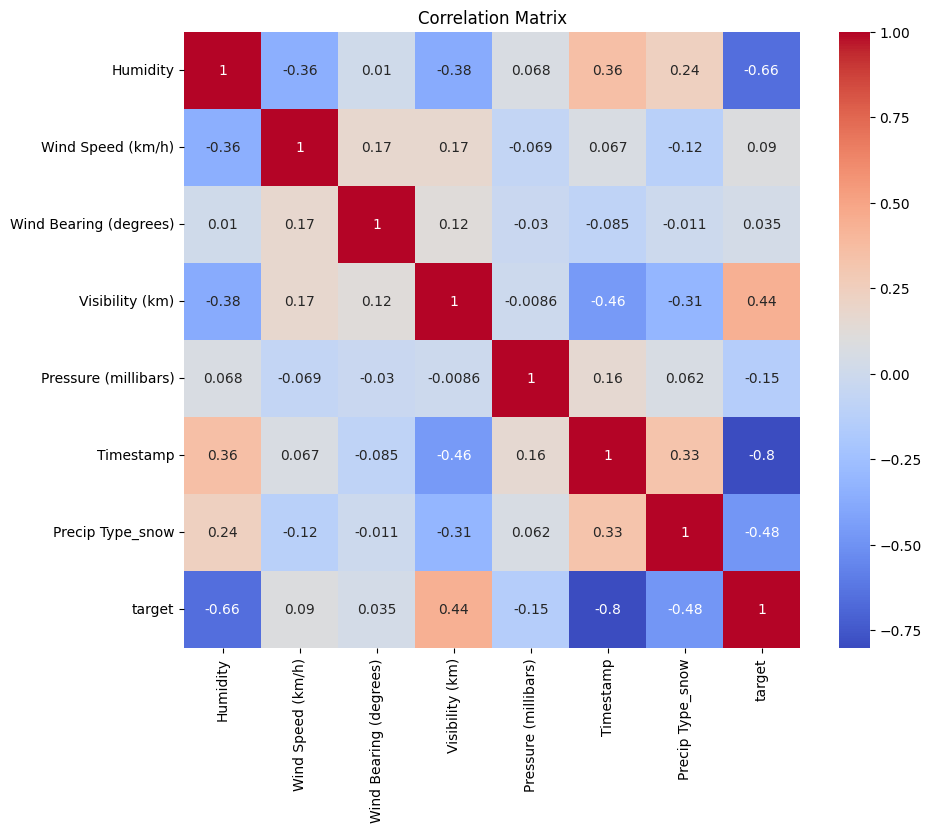

In [ ]:
import seaborn as sns
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

plt.show()

In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 5000 to 8999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Humidity                4000 non-null   float64
 1   Wind Speed (km/h)       4000 non-null   float64
 2   Wind Bearing (degrees)  4000 non-null   float64
 3   Visibility (km)         4000 non-null   float64
 4   Pressure (millibars)    4000 non-null   float64
 5   Timestamp               4000 non-null   float64
 6   Precip Type_snow        4000 non-null   float64
 7   target                  4000 non-null   float64
dtypes: float64(8)
memory usage: 281.2 KB


Признаки: ['Visibility (km)']
Коэффициенты: [11.85653194  3.66108549]
Ошибка на обучающей выборке: 56.056897839142565
Ошибка на тестовой выборке: 83.04420579256234

Признаки: ['Visibility (km)', 'Wind Speed (km/h)']
Коэффициенты: [11.85653194  3.63844819  0.13261007]
Ошибка на обучающей выборке: 56.03982485561183
Ошибка на тестовой выборке: 83.81703951151123

Признаки: ['Visibility (km)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)']
Коэффициенты: [11.85653194  3.65461172  0.15982162 -0.1742232 ]
Ошибка на обучающей выборке: 56.010623025847465
Ошибка на тестовой выборке: 83.33103647448728

Признаки: ['Visibility (km)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']
Коэффициенты: [11.85653194  3.66045805  0.08180354 -0.19719712 -1.1812981 ]
Ошибка на обучающей выборке: 54.622235485358225
Ошибка на тестовой выборке: 79.88647808365808

Признаки: ['Visibility (km)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)', 'Precip Type_snow']
Коэффицие

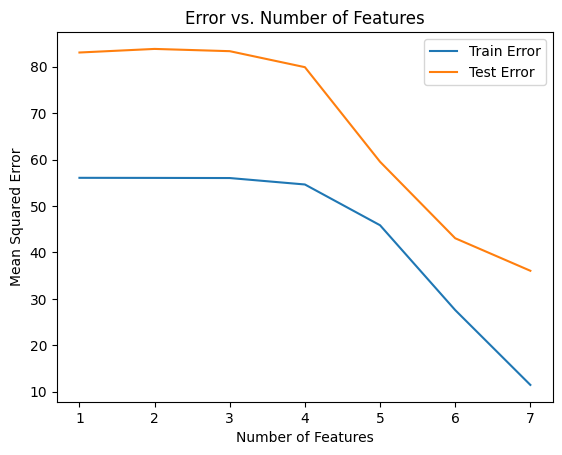

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

sorted_features = correlation_matrix['target'].drop('target').sort_values(ascending=False).index

# Функция для вычисления коэффициентов
def calculate_coefficients(X, Y):
    X_with_ones = np.hstack((np.ones((X.shape[0], 1)), X))
    coefficients = np.linalg.inv(X_with_ones.T.dot(X_with_ones)).dot(X_with_ones.T).dot(Y)
    return coefficients

# Переменные для хранения ошибок
train_errors = []
test_errors = []

# Постепенно добавляем признаки и оцениваем модель
for i in range(1, len(sorted_features) + 1):
    selected_features = sorted_features[:i]
    X_train_selected = X_train[selected_features].values
    X_test_selected = X_test[selected_features].values

    # Вычисляем коэффициенты
    coefficients = calculate_coefficients(X_train_selected, y_train)

    # Предсказания на обучающей и тестовой выборках
    res_y_tr = np.dot(np.hstack((np.ones((X_train_selected.shape[0], 1)), X_train_selected)), coefficients)
    res_y_ts = np.dot(np.hstack((np.ones((X_test_selected.shape[0], 1)), X_test_selected)), coefficients)

    # Вычисляем ошибки
    train_error = mean_squared_error(y_train, res_y_tr)
    test_error = mean_squared_error(y_test, res_y_ts)

    train_errors.append(train_error)
    test_errors.append(test_error)

    # Выводим текущие результаты
    print(f"Признаки: {selected_features.tolist()}")
    print(f"Коэффициенты: {coefficients}")
    print(f"Ошибка на обучающей выборке: {train_error}")
    print(f"Ошибка на тестовой выборке: {test_error}\n")

# Визуализация изменения ошибок
import matplotlib.pyplot as plt

plt.plot(range(1, len(sorted_features) + 1), train_errors, label='Train Error')
plt.plot(range(1, len(sorted_features) + 1), test_errors, label='Test Error')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Error vs. Number of Features')
plt.show()

In [ ]:
from scipy.optimize import curve_fit

def mapping_func(x, a, b, c, b1, b2,b3,b4,b5,b6,b7):
  return a + b*x['Timestamp'] + c * x['Timestamp']**2 + b1 *x['Humidity'] + b2 *x[ 'Wind Speed (km/h)'] + b3 *x[ 'Wind Bearing (degrees)'] + b4 *x['Visibility (km)'] + b5 *x[ 'Pressure (millibars)'] +b6 *x[ 'Timestamp'] +b7 *x['Precip Type_snow']


args, covar = curve_fit(mapping_func, X_train, y_train)

a, b, c, b1, b2, b3, b4, b5, b6, b7  = args[0], args[1], args[2], args[3], args[4], args[5], args[6], args[7], args[8], args[9]

res_y_tr = a + b*X_train['Timestamp'] + c * X_train['Timestamp']**2 + b1 *X_train['Humidity'] + b2 *X_train[ 'Wind Speed (km/h)'] + b3 *X_train[ 'Wind Bearing (degrees)'] + b4 *X_train['Visibility (km)']+ b5 *X_train[ 'Pressure (millibars)'] +b6 *X_train[ 'Timestamp'] +b7 *X_train['Precip Type_snow']
res_y_ts = a + b*X_test['Timestamp'] + c * X_test['Timestamp']**2 + b1 *X_test['Humidity'] + b2 *X_test[ 'Wind Speed (km/h)'] + b3 *X_test[ 'Wind Bearing (degrees)'] + b4 *X_test['Visibility (km)']+ b5 *X_test[ 'Pressure (millibars)'] +b6 *X_test[ 'Timestamp'] +b7 *X_test['Precip Type_snow']


In [ ]:
paint(res_y_tr, res_y_ts, 'МНК трэйн','МНК тест')

In [ ]:
print("Метрики качества для МНК на обучающей выборке")
quality_assessment(res_y_tr, y_train)
print("\nМетрики качества для МНК на тестовой выборке")
quality_assessment(res_y_ts, y_test)

Метрики качества для МНК на обучающей выборке
MSE: 10.82457199246243
RMSE: 3.2900717305953115
MAE: 2.5552669208647107
MAPE: inf
R^2 Score: 0.844162069189373

Метрики качества для МНК на тестовой выборке
MSE: 10.927462525950483
RMSE: 3.3056712670727686
MAE: 2.648447773134535
MAPE: 480.4523744192647
R^2 Score: 0.32418828771889696


<ipython-input-15-485d59e34de0>:13: RuntimeWarning:

divide by zero encountered in divide



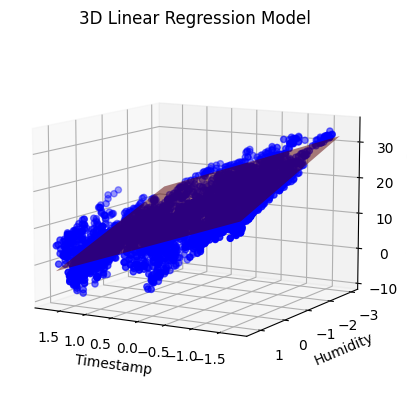

In [ ]:
# Создание 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Плоскость регрессии
xx, yy = np.meshgrid(np.linspace(X_train_selected[:, 0].min(), X_train_selected[:, 0].max(), 100),
                     np.linspace(X_train_selected[:, 1].min(), X_train_selected[:, 1].max(), 100))
zz = coefficients[0] + coefficients[1] * xx + coefficients[2] * yy

# Отображение плоскости регрессии
ax.plot_surface(xx, yy, zz, alpha=0.5, rstride=100, cstride=100, color='r')

# Отображение точек данных
ax.scatter(X_train_selected[:, 0], X_train_selected[:, 1], y_train, c='b', marker='o')

# Настройка графика
ax.set_xlabel('Timestamp')
ax.set_ylabel('Humidity')
ax.set_zlabel('Temperature (C)')
plt.title('3D Linear Regression Model')

# Установка угла обзора
ax.view_init(elev=10, azim=120)  # Измените значения elev и azim по вашему усмотрению

plt.show()